<a href="https://colab.research.google.com/github/AlmaRosa13/Metodos_Numericos/blob/main/Cap_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

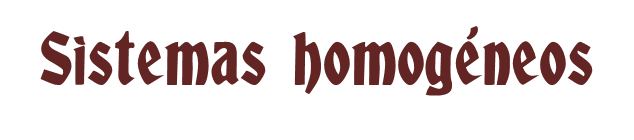

Un sistema de ecuaciones lineales homogéneo se caracteriza porque el vector de constantes es cero $b=0$

$Ax=0$ En un sistema homogéneo siempre existe la solución trivial
$x_1=0, x_2=0, x_3=0, \dots, x_n=0.$

En otros casos existen muchas soluciones, donde se debe seleccionar una de ellas para aplicar al problema. El resultado del paso de la reducción genera una matriz con menos ecuaciones que incógnitas, por lo tanto, el conjunto solución queda en términos de las mismas incógnitas, de manera que la definición de una de ellas da como resultado el resto de las variables, así hay múltiples soluciones.

# ***Ejemplo 3.3- *** *Método de reducción de matriz escalonada.*
---



Se tiene la siguiente matriz utilizar el método de reducción.

$x_1-2x_3=0$ \\
$x1-x4=0$ \\
$3x1+4x2-4x3-3x4=0$ \\
$2x2-x4=0$ \\
$x2-x3=0$

El sistema es homogéneo, aplicar la eliminación de Gauss-Jordan genera un sistema con menos renglones.

In [ ]:
import numpy as np
import sympy as sp

def main ():
    a=np.array([[1 , 0 , -2, 0 ],\
                [ 1 , 0 , 0, -1 ],\
                [ 3 , 4 , -4, -3 ],\
                [ 0 , 2 , 0, -1 ],\
                [ 0 , 1 , -1, 0 ]])
    b=np.array([0 ,0 ,0 ,0 ,0])
    n,c=np.shape(a)
    r=np.linalg.matrix_rank(a)
    ab=np.c_[a,b]
    ra=np.linalg.matrix_rank(ab)
    print('rango(A)={}; rango(Ab)={}; n={}'.format(r,ra,c))

    if (r== ra ==c):
        print('Solución única')
        x=np.linalg.solve(a,b)
        print(x)
    if (r==ra <c):
        print('Múltiples soluciones')
        x=sp.Matrix(a).rref()
        print(x)
    if (r<ra):
        print('Sin solución')

if __name__=="__main__":main()

rango(A)=3; rango(Ab)=3; n=4
Múltiples soluciones
(Matrix([
[1, 0, 0,   -1],
[0, 1, 0, -1/2],
[0, 0, 1, -1/2],
[0, 0, 0,    0],
[0, 0, 0,    0]]), (0, 1, 2))


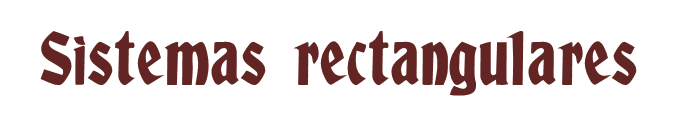

Los sistemas rectangulares son sistemas con más ecuaciones que incógnitas (sobre determinado) o menos ecuaciones que incógnitas (sub determinado) 𝑚≠𝑛. Cualquiera de los casos resulta en un conjunto solución que se expresa en términos de una de las variables

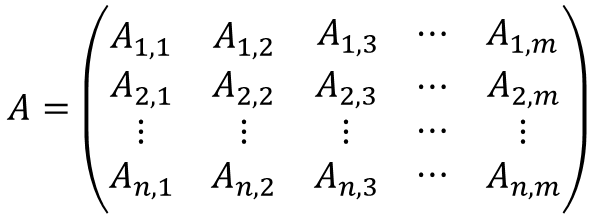

El paso de la reducción elimina las ecuaciones que son múltiples y el resultado se expresa como un vector que sigue ciertas proporciones de una de las variables.


# ***Ejemplo 3.4 —*** *Método de sistemas rectangulares.*
---



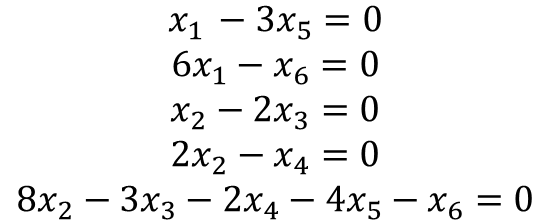

In [ ]:
import numpy as np
import sympy as sp

def main():
    a=sp.Matrix([[1, 0, 0, 0, -3, 0],\
                [6, 0, 0, 0, 0, -1],\
                [0 , 1, -2, 0, 0, 0],\
                [0, 2, 0,-1, 0, 0],\
                [0, 8, -3, -2, -4, -1]])
    b=sp.Matrix([0, 0, 0, 0, 0])
    xvars=sp.symbols('x1, x2, x3, x4, x5, x6')
    x=sp.Matrix(xvars)
    sol=sp.solve(a*x-b, xvars)
    print('Solucion:{}'.format(sol))

if __name__=="__main__":main()

Solucion:{x1: x6/6, x2: 22*x6/45, x3: 11*x6/45, x4: 44*x6/45, x5: x6/18}


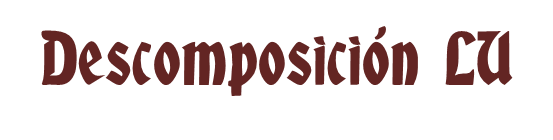

La eliminación de Gauss aplica la reducción de la matriz extendida de coeficientes $A$ y el vector de constantes $b$. Si en un segundo sistema se tiene una misma matriz $A$ con un vector de constantes $b$ distinto, se usarán los mismos factores de reducción $k$ para resolver ambos sistemas.
El método de descomposición $LU$ crea una matriz $L$ con los factores $k$ de reducción, la matriz $U$ es la matriz triangular superior resultado de la reducción. Si se aplica en un siguiente paso los factores de reducción que se guardaron en $L$ al vector de constantes $b$, se obtendrá el mismo resultado que en el método de eliminación de Gauss. La misma matriz $L$ se aplica a otro vector de constantes $b$, sin la necesidad de volver a calcular los factores $k$, porque ya fueron almacenados en $L$.
Al multiplicar $LU$ obtenemos la misma matriz $A$, de tal manera que

$[Ax=b]=[{LU}x=b]$

donde
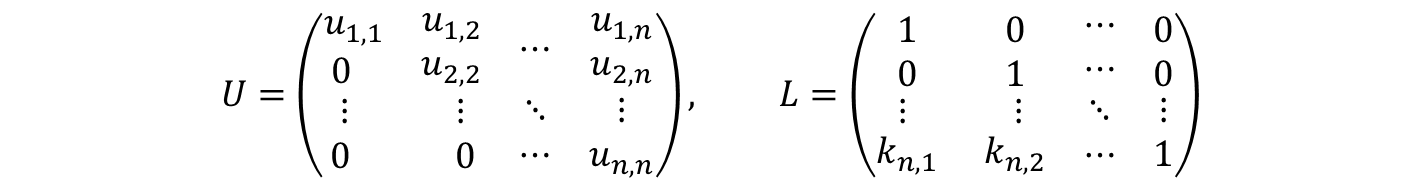

Donde se cumplen las siguientes propiedades $A=LU$ y $Lb=d$

De esta manera se obtiene la matriz triangular $U$ y el vector $d$ que son necesarios para el segundo paso de la sustitución hacia atrás. Lo conveniente del método de descomposición $LU$ es que independiza
los factores de reducción $k$ y se pueden aplicar a distintos vectores de constantes $b$.

# **Ejemplo 3.5 —**  * Método de descomposición LU. *
---
En una reunión hay 22 personas, entre hombres, mujeres y niños. El doble del número de mujeres más el triple del número de niños, es igual al doble del número de hombres.
*   a) Con estos datos, ¿Se puede saber el número de hombres que hay?
*   b)Si, además, se sabe que el número de hombres el doble de mujeres, ¿Cuátos hombres, mujeres y niños hay?

***Solucion.-***

LLamemos x al número de hombres, y al de mujeres y z al de niños.

Como hay 22 personas, tenemos que: $x+y+z=22$. \\
Con el otro dato, planteamos otra ecuación $2y+3z=2x$ \\
Solo con estos datos no es posible saber el número de hombres (ni de mujeres, ni el de niños) que hay. Es un sistema compatible indeterminado; como tenemos tres incógnitas, para que pueda ser compatible determinado, necesitamos otra ecuación.

In [ ]:
import numpy as np
import scipy as sp
import sympy as sp

# Definir la matriz A que deseas descomponer
def main():
    a=sp.Matrix([[1, 1, 1],\
                [-2, 2, 3]])
    b=sp.Matrix([22, 0])
    xvars=sp.symbols('x1, x2, x3')
    x=sp.Matrix(xvars)
    sol=sp.solve(a*x-b, xvars)

# Obtener las dimensiones de la matriz A
    print('Multiples soluciones')
    print('Solucion:{}'.format(sol))

if __name__=="__main__":main()

Multiples soluciones
Solucion:{x1: x3/4 + 11, x2: 11 - 5*x3/4}


> **Continuación del PROBLEMA 1.-**
---
En una reunión hay 22 personas, entre hombres, mujeres y niños. El doble del número de mujeres más el triple del número de niños, es igual al doble del número de hombres.

*   b)Si, además, se sabe que el número de hombres el doble de mujeres, ¿Cuátos hombres, mujeres y niños hay?

***Solucion.-***

LLamemos x al número de hombres, y al de mujeres y z al de niños.

Como hay 22 personas, tenemos que: $x+y+z=22$
Con el otro dato, plantemaos otra ecuación $2y+3z=2x$
Con este dato que es añadido $x=2y$, se puede plantear el sistema:

In [ ]:
import numpy as np
import scipy as sp

# Definir la matriz A que deseas descomponer
a = np.array([[1,1,1],
              [-2,2,3],
              [1, -2, 0]])
b =np.array([22,0,0])
# Obtener las dimensiones de la matriz A
n,c=np.shape(a)
r=np.linalg.matrix_rank(a)
ab=np.c_[a,b]
ra=np.linalg.matrix_rank(ab)


#print('rango(A)={}; rango(Ab)={}; n={}'.format(r,ra,c))

if (r==ra==c):
    print('Solución única')
    lu,piv=sp.linalg.lu_factor(a)
    x=sp.linalg.lu_solve((lu,piv),b)
    print("Matriz LU:")
    print(lu)
    print('Por tanto, hay:')
    print(x[0], 'Hombres')
    print(x[1], 'Mujeres')
    print(x[2], 'Niños')

if (r==ra<c):
    print('Multiples soluciones')

if (r<ra):
    print('Sin solución')

Solución única
Matriz LU:
[[-2.    2.    3.  ]
 [-0.5   2.    2.5 ]
 [-0.5  -0.5   2.75]]
Por tanto, hay:
12.0 Hombres
6.0 Mujeres
4.0 Niños


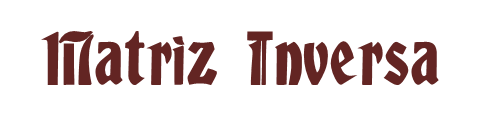

En un sistema de ecuaciones lineales, representado por la ecuación $Ax = b$ la incógnita a resolver es el vector $x$, si despejamos este vector de la ecuación, tendremos la solución del sistema. \\

$Ax = b$ \\
$A^{1}Ax = A^{1}b$ \\
$x = A^{1}b$ \\

Donde $A^{-1}$ es la inversa de $A$, entonces la solución se obtiene usando la inversa $A^{-1}$ y multiplicarla por el vector de constantes $b$

# **Ejemplo 4.6— ** *Método de inversa-multiplicación.*

Un arreglo de cuatro reactores en los cuales
se lleva a cabo la reacción $A --k_{i}--> B$ Donde $k_i$ es la constante de reacción en cada reactor.

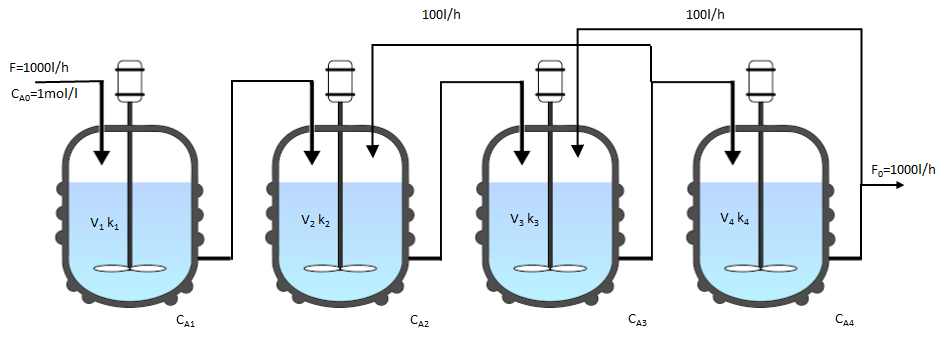

Figura 3.5. Arreglo de reactores agitados

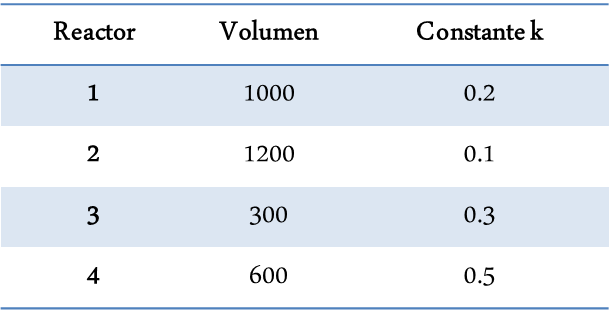

La reacción en cada tanque es de primer orden y la velocidad de reacción es $r =VkC_A$. Determinar
la concentración de salida de cada tanque $C_{A1},C_{A2},C_{A3},C_{A4}$

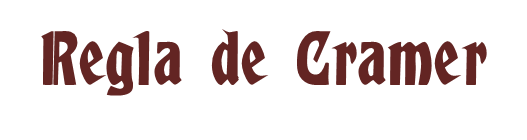

La regla de Cramer se aplica a sistemas compatibles determinados, es decir, se aplica sólo a sistemas que tienen solución única. Para validar que tienen solución única, se requiere obtener el determinante de la matriz de coeficientes $\Delta A$, si éste es distinto de cero, entonces tienen solución única, de lo contrario no tiene solución o tiene múltiples soluciones.

El siguiente paso es sustituir la primera columna de $A$ por el vector $b$ y obtener el determinante de esta matriz modificada $\Delta A_1$, el valor de la primera incógnita se calcula como:

$x_{1}=\frac{ΔA_1}{ΔA}$

Para la segunda incógnita se sustituye la segunda columna de $A$ por el vector $b$, se obtiene el
determinante $\Delta A2$, el valor de la segunda incógnita ahora se obtiene como:

$x_{1}=\frac{ΔA_2}{ΔA}$

# **Ejemplo 3.8 — *Regla de Cramer*.**

Obtener el conjunto solución del siguiente sistema usando la regla de Cramer. \\


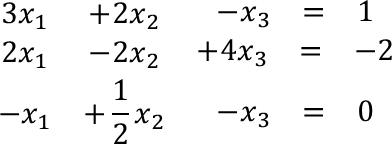

In [ ]:
import numpy as np
import scipy as sp

def cramer(A,b):
    dA=np.linalg.det(A)
    _,n=np.shape(A)
    if (dA ==0):
        raise ValueError('El sistema no tiene solución por la regla de Cramer')
    x=np. zeros (n)
    for i in range (n):
        di=np. copy (A)
        di [:,i]=b
        x[i]=np.linalg.det(di)/dA

    return x

def main ():
     A=np.array([[3,2,-1],[2 ,-2,4],[-1,1/2,-1]])
     b=np.array([1,-2,0])
     x= cramer(A,b)
     print('El vector x es:', x)
     print('Valor de posición x0:', x[0])
     print('Valor de posición x1:', x[1])
     print('Valor de posición x2:', x[2])

if __name__ == "__main__":main()

El vector x es: [ 1. -2. -2.]
Valor de posición x0: 0.9999999999999987
Valor de posición x1: -1.9999999999999984
Valor de posición x2: -1.9999999999999984


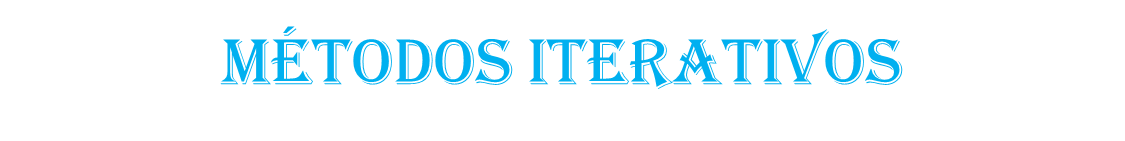

Los métodos iterativos se caracterizan por encontrar el conjunto solución por medio de aproximaciones que parten de una suposición inicial, la condición de paro se da cuando se cumple una condición que satisface para aceptar la aproximación como correcta.

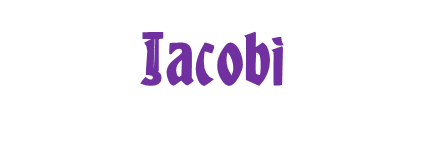

En el método de Jacobi se descompone la matriz de coeficientes $A$ en dos matrices, una se compone de los elementos de la diagonal $D_{i,i} = A_{i,i}$. La matriz $D$ no debe tener elementos cero, si fuera así, se deben intercambiar los renglones para evitar el caso. La otra matriz es el resto de los elementos, es decir, los elementos que no son la diagonal $R_{i,j} = A_{i,j}$, de tal manera que $A=D+R$.

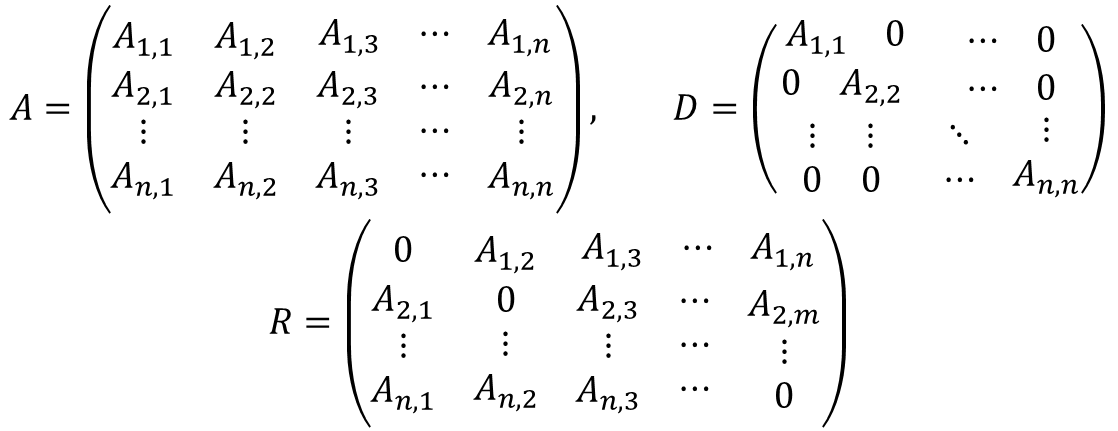

Por lo tanto, la ecuación que describe un sistema de ecuaciones lineales $Ax = b$ ahora se expresa
como $[D+R]x = b$. \\

$Dx+Rx=b$ \\
    $Dx = b-Rx$ \\
$D^{-1}Dx = D^{-1}(b-Rx)$ \\
      $x = D^{-1}(b-Rx)$ \\


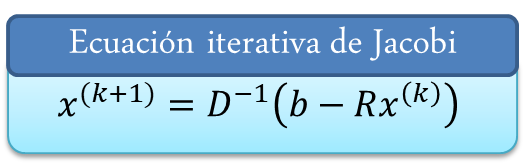

La ecuación iterativa de Jacobi se inicia con valores supuestos $x^{(k)}$ y la ecuación iterativa obtiene los siguientes valores $x^{(k+1)}$. El proceso se repite hasta que la diferencia absoluta entre $x^{(k+1)}$ y $x^{(k)}$ sea
mínima. \\
Un proceso alternativo es despejar $x_i$ de la i-ésima ecuación, luego se supone el vector inicial $x^{(0)}$ y se hacen sustituciones simultáneas, de tal manera que para todas las ecuaciones se tiene la ecuación
iterativa:

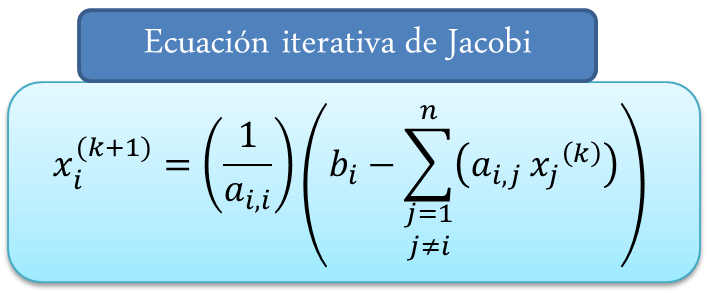








# **Ejemplo 3.9 — *Método de Jacobi*.**

En una columna de 5 platos, se requiere absorber benceno contenido en una corriente de gas $V$, con aceite $L$ que circula a contracorriente del gas. Considérese que el benceno transferido no altera sustancialmente el número de moles de $V$ y $L$ fluyendo a contracorriente, que la relación de equilibrio está dada por la ley de Henry $(y=mx)$ y que la columna opera a régimen permanente. Calcule la composición en cada plato.

Datos:

$V$ = 100 moles/min \\
$L$ = 500 moles/min \\
$y_0$ = 0.09 fracción molar de benceno en $V$ \\
$x_0$ = 0.0 fracción de benceno en $L$ (el aceite entra por el domo sin benceno) \\
$m$=0.12 \\


Los balances de materia para el benceno en cada plato son:


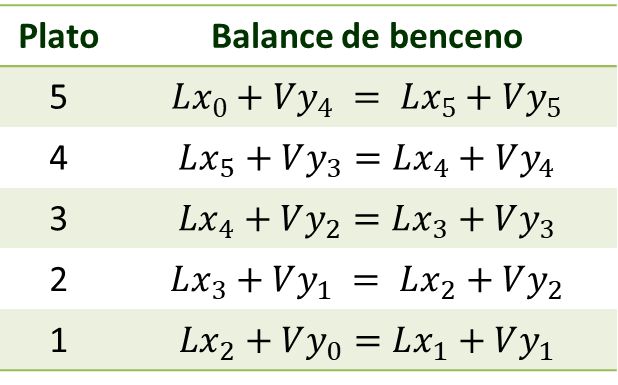

# **Solución**

***Plato 5*** \\
$Lx_0+Vy_4 = Lx_5+Vy_5$ \\
$L(x_0-x_5)+V(y_4-y_5)=0$ \\
$500(0-x_5)+100(0.12x_4-0.12x_5)=0$ \\
$-512x_5+12x_4=0$ \\

***Plato 4*** \\
$Lx_5+Vy_3=Lx_4+Vy_4$ \\
$L(x_5-x_4)+V(y_3-y_4)=0$ \\
$500(x_5-x_4)+100(0.12x_3-0.12x_4)=0$ \\
$500x_5-512x_4+12x_3=0$ \\

***Plato 3*** \\
$Lx_4+Vy_2=Lx_3+Vy_3$ \\
$L(x_4-x_3)+V(y_2-y_3)=0$ \\
$500(x_4-x_3)+100(0.12x_2-0.12x_3)=0$ \\
$500x_4-512x_3+12x_2=0$\\

***Plato 2*** \\
$Lx_3+Vy_1 = Lx_2+Vy_2$ \\
$L(x_3-x_2)+V(y_1-y_2)=0$ \\
$500(x_3-x_2)+100(0.12x_1-0.12x_2)=0$ \\
$500x_3-512x_2+12x_1=0$ \\

***Plato 1*** \\
$Lx_2+Vy_0=Lx_1+Vy_1$ \\
$L(x_2-x_1)+V(y_0-y_1)=0$ \\
$500(x_2-x_1)+100(0.09-0.12x_1)=0$ \\
$-500x_2+512x_1=9$ \\

Sistema

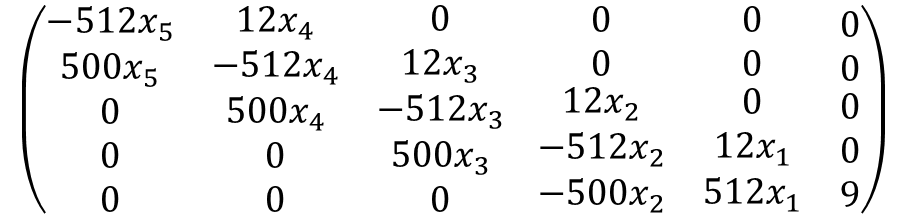


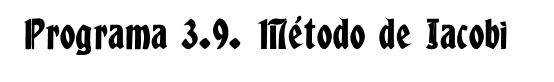

In [6]:
import numpy as np
import scipy as sp

def jacobi (A,b,x,imax=100,tol=1e-8) :
  D=np.diag(A)
  R=A-np.diagflat(D)
  cumple = False
  k=0
  while (not cumple and k<imax):
      xk1=(b-np.dot(R,x))/D
      norma=np.linalg.norm(x-xk1)
      print ('iteracion:{}->{} norma{}'.format(k,x,norma))
      cumple=norma<tol
      x= xk1.copy()
      k+=1

  if k<imax :
   return x
  else:
   raise ValueError('El sistema no converge')

def main():
    A=np.array([[-512, 12, 0, 0, 0] ,\
    [500, -512, 12, 0, 0] ,\
    [0, 500, -512, 12, 0] ,\
    [0, 0, 500, -512, 12] ,\
    [0, 0, 0, -500, 512]])
    b =np.array([0, 0, 0, 0, 9])
    x =np.array([0, 0, 0, 0, 0])
    x=jacobi(A,b,x)
    print ('Solución', x)
    print ('El conjunto solución es:')
    print ('Plato 1:', x[4])
    print ('Plato 2:', x[3])
    print ('Plato 3:', x[2])
    print ('Plato 4:', x[1])
    print ('Plato 5:', x[0])

if __name__=="__main__":main()

iteracion:0->[0 0 0 0 0] norma0.017578125
iteracion:1->[-0.         -0.         -0.         -0.          0.01757812] norma0.0004119873046875
iteracion:2->[-0.         -0.         -0.          0.00041199  0.01757812] norma0.00040244720698264793
iteracion:3->[-0.00000000e+00 -0.00000000e+00  9.65595245e-06  4.11987305e-04
  1.79804564e-02] norma1.8860639955397488e-05
iteracion:4->[-0.00000000e+00  2.26311386e-07  9.65595245e-06  4.30846587e-04
  1.79804564e-02] norma1.842919899944634e-05
iteracion:5->[5.30417310e-09 2.26311386e-07 1.03189741e-05 4.30846587e-04
 1.79988736e-02] norma1.0793356680990857e-06
iteracion:6->[5.30417310e-09 2.47030812e-07 1.03189741e-05 4.31925724e-04
 1.79988736e-02] norma1.0548275284568573e-06
iteracion:7->[5.78978465e-09 2.47030812e-07 1.03645002e-05 4.31925724e-04
 1.79999275e-02] norma6.917571784739033e-08
iteracion:8->[5.78978465e-09 2.48572059e-07 1.03645002e-05 4.31994882e-04
 1.79999275e-02] norma6.760995881613473e-08
iteracion:9->[5.82590764e-09 2.4857

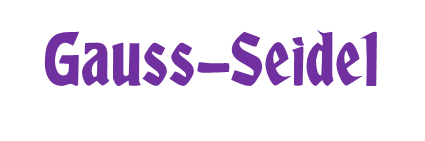

El método de Gauss-Seidel o el método de Liebmann es un método iterativo que separa la matriz de coeficientes $A$ en dos matrices, una matriz triangular inferior $L$ que contiene los elementos de $A$ que están en la diagonal inferior (la diagonal no debe contener ceros) y la matriz $U$ que contiene los elementos de $A$ que están sobre la diagonal.

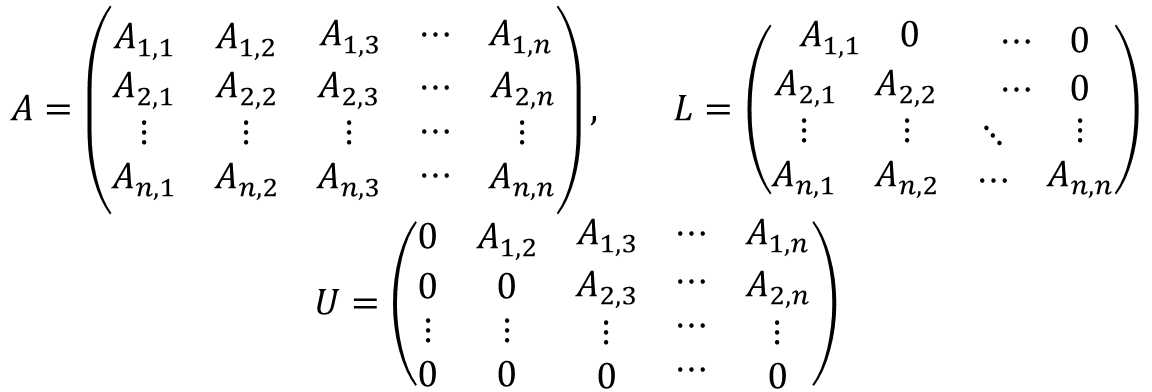


De tal manera que $A=L+U$. La ecuación que describe un sistema de ecuaciones lineales $Ax=b$ ahora se expresa como $[L+U]x=b$.\\

$Lx+Ux=b$ \\
    $Lx = b-Ux$ \\
$L^{-1}Lx = L^{-1}(b-Ux)$ \\
      $x = L^{-1}(b-Ux)$ \\



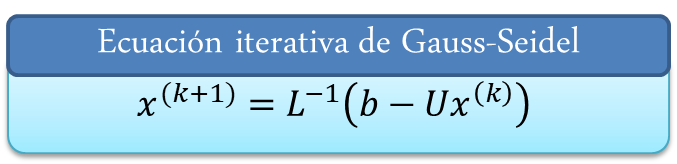

La ecuación iterativa de Gauss-Seidel se inicia con valores supuestos $x^{(k)}$ y la ecuación iterativa obtiene los siguientes valores $x^{(k+1)}$. El proceso se repite hasta que la diferencia absoluta entre $x^{(k+1)}$ y $x^{(k)}$ sea
mínima. \\

Un proceso alternativo es usar las sustituciones sucesivas, se supone un vector inicial $x^{(0)}$ y se sustituyen los valores de la iteración anterior $x^{(k+1)}$ y para los valores que ya se calcularon de $x^{(k)}$

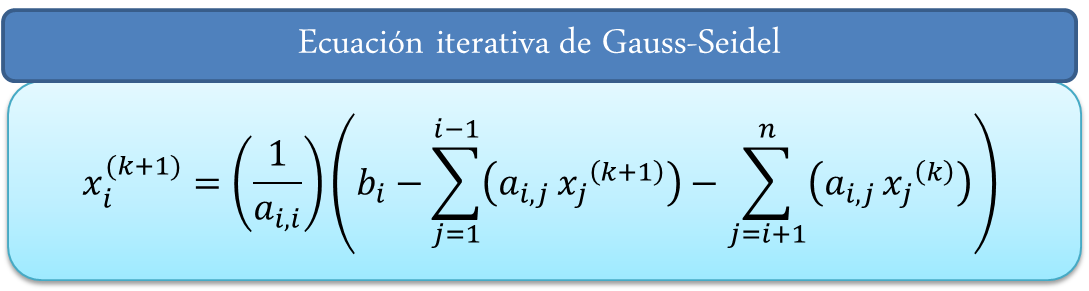



# **Ejemplo 3.10 — *Método de Gauss-Seidel*.**

Resolver el ejemplo 3.9 con los mismos datos usando el método de Gauss-Seidel

Sistema

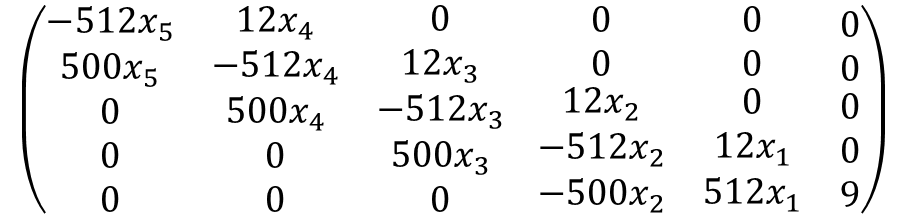


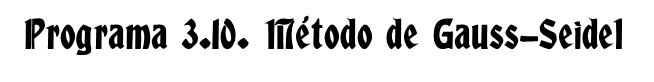

In [13]:
import numpy as np
import scipy as sp

def gaussSeidel (A,b,x,imax=100,tol=1e-8) :
    L=np.tril(A)
    U=A-L
    Linv=np.linalg.inv(L)
    cumple=False
    k=0
    while (not cumple and k<imax):
        xk1=np.dot(Linv,b-np.dot(U,x))
        norma=np.linalg.norm(x-xk1)
        print('iteracion:{}->{} norma{}'.format(k,x,norma))
        cumple=norma<tol
        x=xk1.copy()
        k+=1

    if k<imax :
      return x
    else:
      raise ValueError('El sistema no converge')

def main():
   A=np.array([[-512, 12, 0, 0,0] ,\
              [500, -512, 12, 0, 0] ,\
              [0, 500, -512, 12, 0] ,\
              [0 ,0 ,500 , -512 ,12] ,\
              [0 ,0 ,0 , -500 ,512]])
   b = np. array ([0 ,0 ,0 ,0 ,9])
   x = np. array ([0 ,0 ,0 ,0 ,0])
   x= gaussSeidel (A,b,x)
   print('Solucion:', x)
   print ('El conjunto solución es:')
   print ('Plato 1:', x[4])
   print ('Plato 2:', x[3])
   print ('Plato 3:', x[2])
   print ('Plato 4:', x[1])
   print ('Plato 5:', x[0])

if __name__== "__main__":main()


iteracion:0->[0 0 0 0 0] norma0.017578125
iteracion:1->[0.         0.         0.         0.         0.01757812] norma0.000575850723898146
iteracion:2->[0.         0.         0.         0.00041199 0.01798046] norma2.8073220164515078e-05
iteracion:3->[0.00000000e+00 0.00000000e+00 9.65595245e-06 4.30846587e-04
 1.79988736e-02] norma1.663111234926709e-06
iteracion:4->[0.00000000e+00 2.26311386e-07 1.03189741e-05 4.31925724e-04
 1.79999275e-02] norma1.0896921936203857e-07
iteracion:5->[5.30417310e-09 2.47030812e-07 1.03645002e-05 4.31994882e-04
 1.79999950e-02] norma7.373382462926922e-09
Solucion: [5.78978465e-09 2.48572059e-07 1.03676262e-05 4.31999518e-04
 1.79999995e-02]
El conjunto solución es:
Plato 1: 0.017999999529125708
Plato 2: 0.0004319995178247256
Plato 3: 1.0367626202140682e-05
Plato 4: 2.4857205940462257e-07
Plato 5: 5.789784651710761e-09
